<a href="https://colab.research.google.com/github/shreya1504/hello-my-world/blob/main/plant_disesese_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
#import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')

tf version 2.8.0
keras version 2.8.0
gpu is  available


In [ ]:
img_width, img_height = 80,80
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/content/drive/MyDrive/Train/'
validation_data_dir = '/content/drive/MyDrive/Test/'
eval_data_dir = '/content/drive/MyDrive/Validation/'


nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 100
batch_size = 128
num_of_class = 3

In [ ]:
train_datagen = ImageDataGenerator( #Image Augmentation # Research on other parameters
                rescale = 1. / 255, 
                shear_range = 0.25, 
                zoom_range = 0.25,
                rotation_range=10) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) #Image Augmentation


  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size =(img_width, img_height), 
                                                    batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                    shuffle=False)
  
validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False) 

eval_generator = test_datagen.flow_from_directory(eval_data_dir, 
                                                  target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                  shuffle=False)

Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


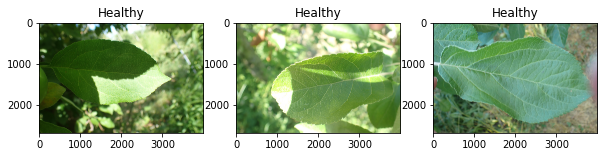

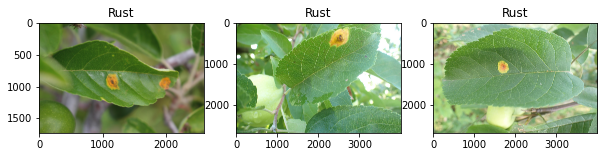

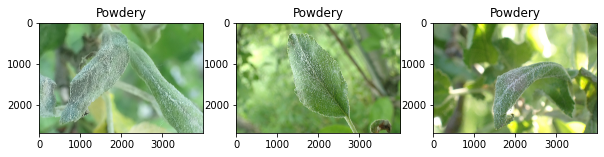

In [ ]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
    

plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')

In [ ]:
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 76, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0

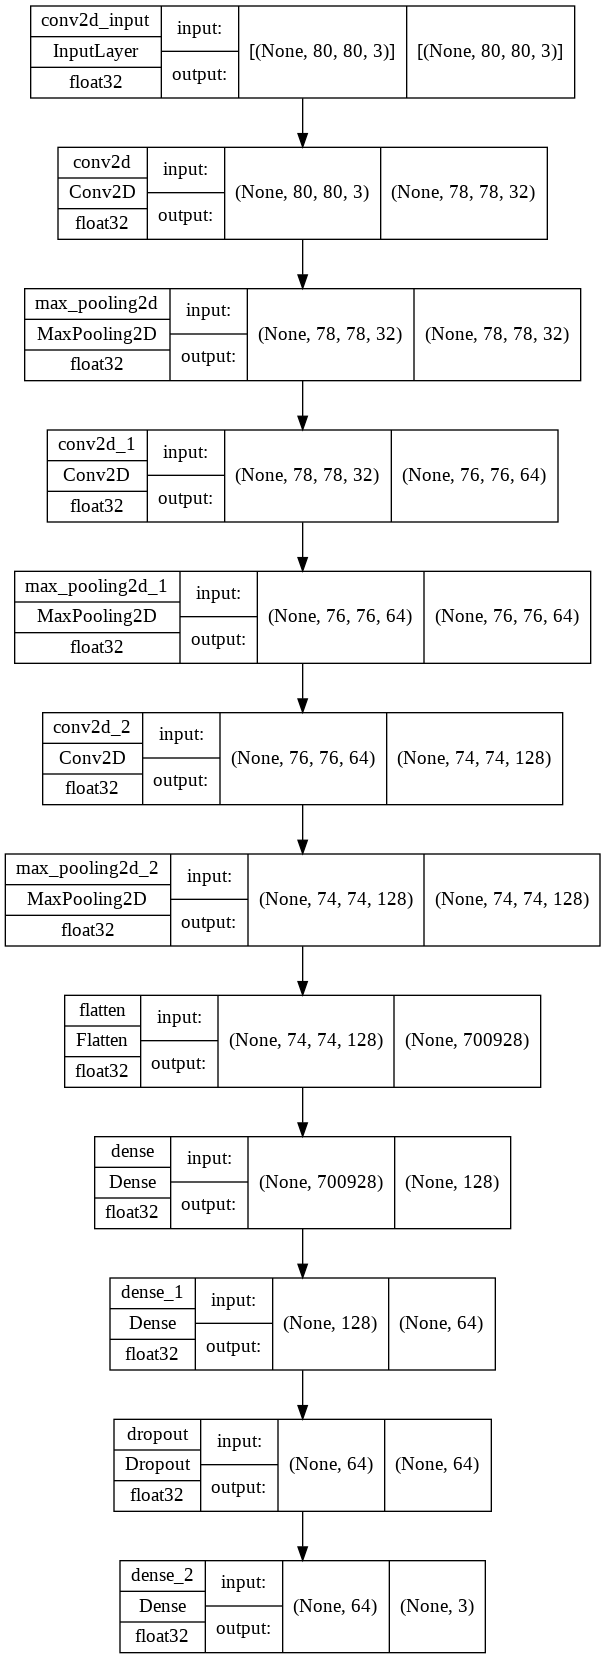

In [ ]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [ ]:
H = model3.fit_generator(train_generator,
    steps_per_epoch = 5 ,#nb_train_samples // batch_size, 
    epochs =20 , validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
5/5 [==============================] - 261s 56s/step - loss: 100.1513 - accuracy: 0.3906 - val_loss: 3.9324 - val_accuracy: 0.3906
Epoch 2/20
5/5 [==============================] - 137s 30s/step - loss: 2.2555 - accuracy: 0.4296 - val_loss: 1.1230 - val_accuracy: 0.3906
Epoch 3/20
5/5 [==============================] - 167s 26s/step - loss: 1.0923 - accuracy: 0.4062 - val_loss: 1.2561 - val_accuracy: 0.2188
Epoch 4/20
5/5 [==============================] - 163s 36s/step - loss: 1.4671 - accuracy: 0.4391 - val_loss: 1.1135 - val_accuracy: 0.3906
Epoch 5/20
5/5 [==============================] - 124s 26s/step - loss: 1.1396 - accuracy: 0.1155 - val_loss: 1.1043 - val_accuracy: 0.2188
Epoch 6/20
5/5 [==============================] - 124s 26s/step - loss: 1.3853 - accuracy: 0.3303 - val_loss: 1.0985 - val_accuracy: 0.3281
Epoch 7/20
5/5 [==============================] - 135s 29s/step - loss: 1.1040 - accuracy: 0.3719 - val_loss: 1.0918 - val_accuracy: 0.4062
Epoch 8/20
5/5 [==

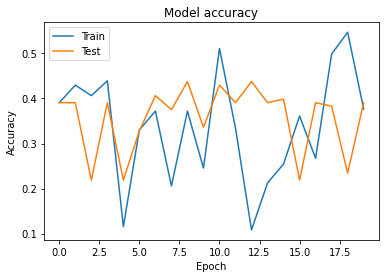

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

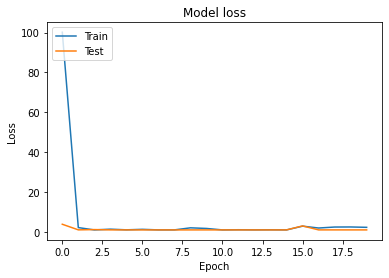

In [ ]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [ ]:
model3.save('./'+NAME+'.hdf5')

In [ ]:
validation_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Classification Report
              precision    recall  f1-score   support

     Healthy       0.33      0.95      0.49        20
     Powdery       0.00      0.00      0.00        20
        Rust       0.50      0.05      0.09        20

    accuracy                           0.33        60
   macro avg       0.28      0.33      0.19        60
weighted avg       0.28      0.33      0.19        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


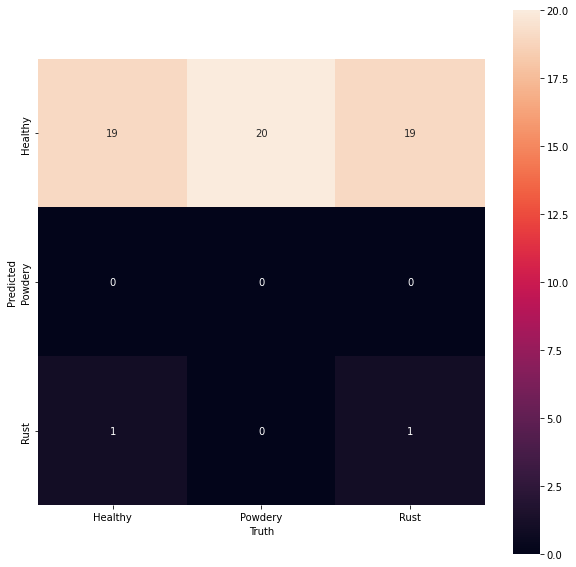

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Classification Report
              precision    recall  f1-score   support

     Healthy       0.34      1.00      0.51        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.33      0.02      0.04        50

    accuracy                           0.34       150
   macro avg       0.22      0.34      0.18       150
weighted avg       0.22      0.34      0.18       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


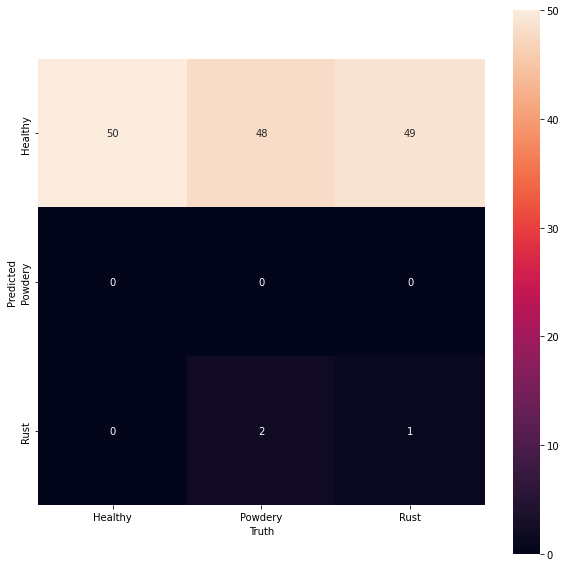

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Classification Report
              precision    recall  f1-score   support

     Healthy       0.34      1.00      0.51        50
     Powdery       0.00      0.00      0.00        50
        Rust       0.33      0.02      0.04        50

    accuracy                           0.34       150
   macro avg       0.22      0.34      0.18       150
weighted avg       0.22      0.34      0.18       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


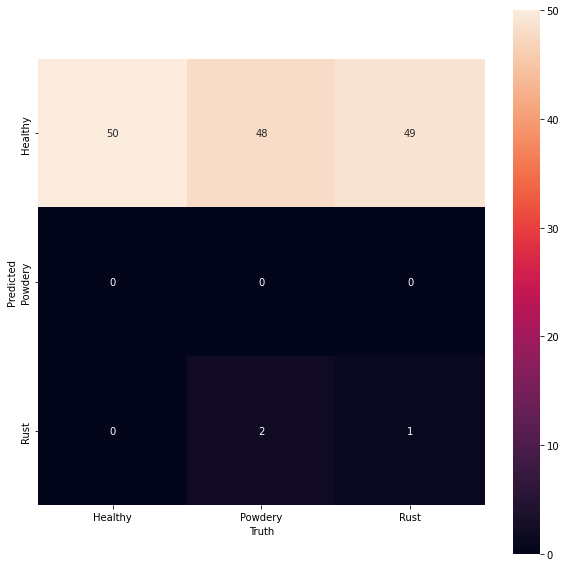

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)